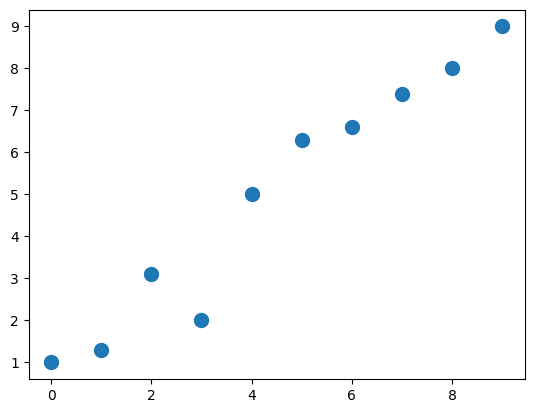

In [33]:
import torch
import numpy as np

X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0, 9.0], dtype='float32')

import matplotlib.pyplot as plt
plt.plot(X_train, y_train, 'o', markersize=10)
plt.show()


In [34]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 2

triain_dl = DataLoader(train_ds, batch_size=batch_size,
                        shuffle=True)

In [35]:
torch.manual_seed(1)

weight = torch.randn(1)
weight.requires_grad = True
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [36]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in triain_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():4f}')


Epoch 0 Loss 54.997528
Epoch 10 Loss 27.029163
Epoch 20 Loss 14.967401
Epoch 30 Loss 21.449856
Epoch 40 Loss 14.875990
Epoch 50 Loss 19.853966
Epoch 60 Loss 1.248935
Epoch 70 Loss 13.179626
Epoch 80 Loss 8.548663
Epoch 90 Loss 4.422430
Epoch 100 Loss 4.011144
Epoch 110 Loss 5.494727
Epoch 120 Loss 0.143885
Epoch 130 Loss 2.442816
Epoch 140 Loss 3.942700
Epoch 150 Loss 1.197545
Epoch 160 Loss 1.768841
Epoch 170 Loss 1.015044
Epoch 180 Loss 1.204435
Epoch 190 Loss 0.978715


In [37]:
print('Final Parameter: ', weight.item(), bias.item())

Final Parameter:  2.432845115661621 4.304121494293213


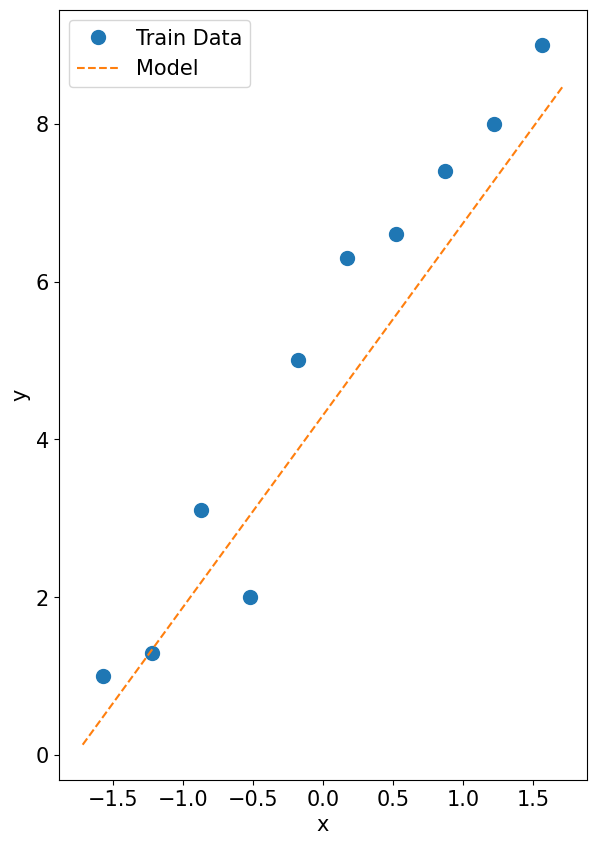

In [38]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_test))/np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 2, 1)
ax.plot(X_train_norm, y_train, 'o', markersize=10)
ax.plot(X_test_norm, y_pred, '--', markersize=10)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.legend(['Train Data', 'Model'], fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)



plt.show()


In [39]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
for epoch in range(num_epochs):
    for x_batch, y_batch in triain_dl:

        pred = model(x_batch)
        print(pred, y_batch)
        print('\n')

        loss = loss_fn(pred, y_batch)

        loss.backward()

        optimizer.step()

        optimizer.zero_grad()

    if epoch % log_epochs == 0:
        print(f"Epoch {epoch} Loss: {loss.item():4f}")

tensor([[5.0693],
        [5.8373]], grad_fn=<AddmmBackward0>) tensor([6.3000, 7.4000])


tensor([[3.9190],
        [4.6879]], grad_fn=<AddmmBackward0>) tensor([3.1000, 5.0000])


tensor([[6.6094],
        [3.5341]], grad_fn=<AddmmBackward0>) tensor([9.0000, 1.3000])


tensor([[6.2200],
        [3.1565]], grad_fn=<AddmmBackward0>) tensor([8., 1.])


tensor([[4.3071],
        [5.4516]], grad_fn=<AddmmBackward0>) tensor([2.0000, 6.6000])


Epoch 0 Loss: 5.953074
tensor([[3.1625],
        [5.8314]], grad_fn=<AddmmBackward0>) tensor([1.0000, 7.4000])


tensor([[3.9271],
        [3.5469]], grad_fn=<AddmmBackward0>) tensor([3.1000, 1.3000])


tensor([[5.4465],
        [5.0652]], grad_fn=<AddmmBackward0>) tensor([6.6000, 6.3000])


tensor([[6.5940],
        [4.6861]], grad_fn=<AddmmBackward0>) tensor([9., 5.])


tensor([[6.2154],
        [4.3072]], grad_fn=<AddmmBackward0>) tensor([8., 2.])


tensor([[6.2126],
        [5.0696]], grad_fn=<AddmmBackward0>) tensor([8.0000, 6.3000])


tensor([[4.

/home/tej/Documents/Courses/Learning/ML_With_PyTorch_Scikit_Practice/env/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([3.1000, 1.3000])


tensor([[6.7957],
        [4.7291]], grad_fn=<AddmmBackward0>) tensor([9., 5.])


tensor([[6.3848],
        [4.3182]], grad_fn=<AddmmBackward0>) tensor([8., 2.])


tensor([[4.7312],
        [3.0808]], grad_fn=<AddmmBackward0>) tensor([5., 1.])


tensor([[5.5548],
        [5.9676]], grad_fn=<AddmmBackward0>) tensor([6.6000, 7.4000])


tensor([[3.4915],
        [5.1448]], grad_fn=<AddmmBackward0>) tensor([1.3000, 6.3000])


tensor([[4.3175],
        [6.7961]], grad_fn=<AddmmBackward0>) tensor([2., 9.])


tensor([[3.9065],
        [6.3797]], grad_fn=<AddmmBackward0>) tensor([3.1000, 8.0000])


tensor([[3.9095],
        [4.7322]], grad_fn=<AddmmBackward0>) tensor([3.1000, 5.0000])


tensor([[5.9656],
        [5.1430]], grad_fn=<AddmmBackward0>) tensor([7.4000, 6.3000])


tensor([[5.5574],
        [4.3223]], grad_fn=<AddmmBackward0>) tensor([6.6000, 2.0000])


tensor([[6.3788],
        [6.7903]], grad_fn=<AddmmBackward0>) tensor([8., 9.])


tensor([[3.0825],
     

In [41]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 0.9170377254486084 4.282405376434326
